#### Notes pour l'analyse descriptive
Les questions d'analyses descriptives que l'on peut se poser:
- Fréquence des accidents: Où se produisent le plus d'accidents ? À quelles heures ?  Quels mois de l'année ?
- Profils des victimes : Quel est l'âge moyen des victimes ? Quel est leur sexe ? Quelle est leur catégorie sociale ?
- Caractéristiques des véhicules impliqués : Quel type de véhicule est le plus souvent impliqué ? Quel est l'âge moyen des véhicules ?
- Conditions météorologiques : Quel est l'impact de la pluie, du brouillard, de la neige sur la fréquence et la gravité des accidents ?
- Quel type de route est le plus dangereux ? Quelle est l'influence de la présence de virages, de passages piétons, etc. ?

Utilisation possible des résultats:
Amélioration de la sécurité routière : Identification des zones à risque, mise en place de mesures de prévention ciblées
- Identification des zones noires : Les zones où les accidents sont fréquents peuvent être traitées en priorité pour améliorer la sécurité.
- Optimisation des patrouilles de police : Les forces de l'ordre peuvent concentrer leurs efforts sur les zones et les moments où le risque d'accident est le plus élevé.
- Facteurs influençant la gravité: En analysant les données sur les blessures et les décès, on peut identifier les facteurs qui aggravent les conséquences des accidents (vitesse, port de la ceinture de sécurité, type de véhicule).
- Prévision de la gravité d'un accident: En combinant différentes variables, on peut développer des modèles prédictifs pour estimer la gravité potentielle d'un accident en fonction des circonstances.

## Projet python pour la data science / 2024-2025

* Kevin, Oscar, Lisa

## Introduction

### Importing packages

In [14]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io

### **I- Présentation des bases de données**

Dans cette partie, nous allons présenté les bases données qui seront utilisées dans ce projet. Il s'agira de faire de brèves descriptions des bases afin de prendre connaissance de leur contenu:
- base des usagers ayant été impliqué dans un accident de circulation en 2023
- base qui donne la description des véhicules impliqués dans un accident de circulation en 2023
- base des lieux où s'est produit l'accident
- base contenant les caractéristiques des accidents.
- base des départements de France
- base des communes de France

In [31]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='/home/onyxia/Projet-Python-pour-la-Data-Science/data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data\usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data\vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data\lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data\caract-2023.csv


In [32]:
# téléchargement de la liste des départements
url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page=1"
response=requests.get(url_code_dep)
data=response.json()
df_code_dep = pd.DataFrame(data["data"])
df_dep=df_code_dep
for i in range(2,7):
    url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page={i}"
    response=requests.get(url_code_dep)
    if response.status_code==200:
        data=response.json()
        df_code_dep1 = pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_dep=pd.concat([df_dep, df_code_dep1], axis=0)





In [ ]:
# téléchargement de la liste des communes
# ce code prend trop de temps
url_code_com ="https://tabular-api.data.gouv.fr/api/resources/8262de72-138f-4596-ad2f-10079e5f4d7c/data/?page=1"
response=requests.get(url_code_com)
data=response.json()
df_code_com = pd.DataFrame(data["data"])
df_com=df_code_com
for i in range(2,1878):
    url_code_com=f"https://tabular-api.data.gouv.fr/api/resources/8262de72-138f-4596-ad2f-10079e5f4d7c/data/?page={i}"
    response=requests.get(url_code_com)
    if response.status_code==200:
        data = response.json()
        df_code_com1=pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_com=pd.concat([df_com, df_code_com1], axis=0)

C:\Users\lisaw\AppData\Local\Temp\ipykernel_24512\3467158947.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_com=pd.concat([df_com, df_code_com1], axis=0)


KeyboardInterrupt: 

<Response [500]>

In [ ]:
df_dep.head()

,__id,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,01,84,01053,5,AIN,Ain,Ain
1,2,02,32,02408,5,AISNE,Aisne,Aisne
2,3,03,84,03190,5,ALLIER,Allier,Allier
3,4,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,5,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


In [ ]:
df_com.head()

,__id,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,01,84,01053,5,AIN,Ain,Ain
1,2,02,32,02408,5,AISNE,Aisne,Aisne
2,3,03,84,03190,5,ALLIER,Allier,Allier
3,4,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,5,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


In [7]:
df_code_com.head()

NameError: name 'df_code_com' is not defined

In [8]:
# base des usagers 
df_usagers = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv", sep = ';')
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [9]:
# Base des véhicules 
df_vehicules = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv", sep = ';')
df_vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [10]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head()

C:\Users\lisaw\AppData\Local\Temp\ipykernel_24512\2020527371.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [11]:
df_caract = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [13]:
df_caract.shape

(54822, 15)

## Fusion des bases de données

In [33]:

df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")
df_merge.shape

(163683, 56)

In [ ]:
# ajout du libellé des départements

df_code_dep=df_dep[["DEP","LIBELLE"]]
#df_code_com=df_com[["COM","LIBELLE"]]
df_merge=pd.merge(left=df_merge, right=df_code_dep,left_on="dep", right_on="DEP", how="left")
#database=pd.merge(left=df_merge, right=df_code_com,left_on="com", right_on="COM", how="left")
database=df_merge.drop(["DEP"], axis=1)
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163683 entries, 0 to 163682
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      163683 non-null  int64  
 1   id_usager    163683 non-null  object 
 2   id_vehicule  163683 non-null  object 
 3   num_veh_x    163683 non-null  object 
 4   place        163683 non-null  int64  
 5   catu         163683 non-null  int64  
 6   grav         163683 non-null  int64  
 7   sexe         163683 non-null  int64  
 8   an_nais      160171 non-null  float64
 9   trajet       163683 non-null  int64  
 10  secu1        163683 non-null  int64  
 11  secu2        163683 non-null  int64  
 12  secu3        163683 non-null  int64  
 13  locp         163683 non-null  int64  
 14  actp         163683 non-null  object 
 15  etatp        163683 non-null  int64  
 16  num_veh_y    163683 non-null  object 
 17  senc         163683 non-null  int64  
 18  catv         163683 non-

## Nettoyage de la base

In [ ]:
# gerer les valeurs manquantes et les recodages. se servir de la documentation des variables

(20, 2)

## Description univariées

Cette base recense l'ensemble des usagers qui ont été impliqué dans au moins un accident sur le térritoire français.

In [56]:
print(f"la base usagers a {df_usagers.shape[0]} observations et {df_usagers.shape[1]} variables.")

la base usagers a 125789 observations et 16 variables.


Text(0, 0.5, 'percentage(%)')

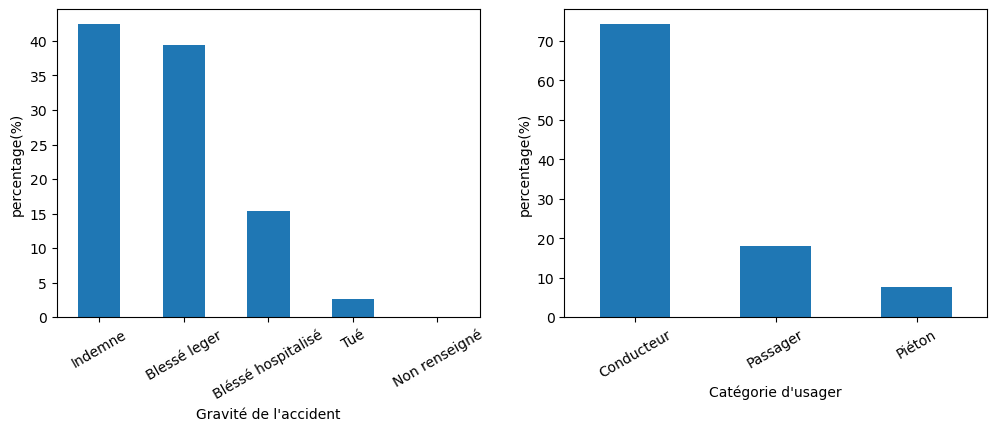

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(grav_nv.value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")

plt.subplot(1,2,2)
catu_dict={1:"Conducteur",2:"Passager",3:"Piéton"}
catu_nv=df_usagers['catu'].replace(catu_dict)
catu_prct=(catu_nv.value_counts()/df_usagers.shape[0])*100
catu_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Catégorie d'usager")
plt.ylabel("percentage(%)")


Text(0, 0.5, 'percentage(%)')

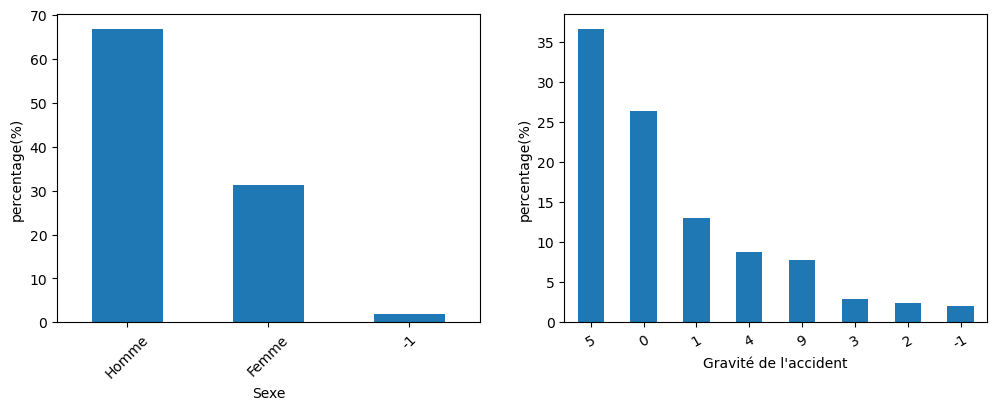

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sexe_dict={1:"Homme",2:"Femme"}
sexe_nv=df_usagers['sexe'].replace(sexe_dict)
sexe_prct=(sexe_nv.value_counts()/df_usagers.shape[0])*100
sexe_prct.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Sexe")
plt.ylabel("percentage(%)")


plt.subplot(1,2,2)
#grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
#grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(df_usagers['trajet'].value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")


In [ ]:
#cration carte
import geopandas as gpd

In [ ]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

plt.title("Nombre d'accidents de la route par département")
plt.axis("off")
plt.show()

In [ ]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

In [ ]:
import folium
from folium.plugins import HeatMap

accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centrée sur l'Île-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter la carte de densité
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)

# Afficher la carte
map_idf